## Import modules: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

import bokeh.io
import bokeh.plotting
import holoviews as hv 
import hvplot
import hvplot.pandas

## Function definitions: 

In [2]:
def essential_subset(df, subset_cols, subset_name):
    df_temp = df[['Rv_ID', 'gene_name']+subset_cols].copy()
    df_temp[subset_name] = df_temp.sum(numeric_only=True, axis = 1)
    
    df_temp.sort_values(by=subset_name, ascending=False, inplace=True)
    df_temp.reset_index(inplace=True, drop=True)
    df_temp = df_temp[['Rv_ID', 'gene_name', subset_name] + subset_cols]
    
    return df_temp

## Files and paths: 

In [3]:
dir_data = '../../data/standardized_data/'
dir_figs = '../../figures/Tn_mat_stats/'

Load binary dataset: 

In [4]:
bin_file = os.path.join(dir_data, 'result_bin_matrix_2020_08_27.csv')
df_bin = pd.read_csv(bin_file)
df_bin.head(2)

,Rv_ID,PE35_KO_vs_mbio_H37Rv,PPE68_KO_vs_mbio_H37Rv,Rv0950c_KO_vs_CB_WT,Rv0954_KO_vs_RJ_WT,Rv1096_KO_vs_CB_WT,Rv3005c_KO_day32_vs_dejesus_H37Rv_day32,Rv3594_KO_vs_Rubin_FLUTE_WT,Rv3684_KO_vs_CB_WT,Rv3717_KO_vs_Rubin_FLUTE_WT,...,zhang_AA_Rescue_vs_zhang_in_vitro_control_Rescue,zhang_DETA-NO_pH_7.0_vs_zhang_pH_7.0_no_NO_control,zhang_Fe_1.5mM_vs_zhang_Fe_450uM,zhang_Trp_Rescue_vs_zhang_in_vitro_control_Rescue,zhang_Tyloxapol_pH_6.5_vs_zhang_Tyloxapol_pH_4.5,zhang_Tyloxapol_pH_6.5_vs_zhang_pcit_pH_4.5,zhang_mhcii_mouse_d10_vs_zhang_wt_mouse_d10,zhang_mhcii_mouse_d45_vs_zhang_wt_mouse_d45,zhang_wt_mouse_d10_vs_zhang_input_library,zhang_wt_mouse_d45_vs_zhang_input_library
0,Rv0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Rv0002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_bin['sum_CES'] = df_bin.sum(numeric_only=True, axis = 1)

### Annotations: 

In [6]:
#### COG
file_cog = '../../data/annotations/H37Rv_COG_mapping.xlsx'
df_cog_map = pd.read_excel(file_cog)

file_cog_def = '../../data/annotations/cog_names.csv'
df_cog_def = pd.read_csv(file_cog_def)
df_cog_def.rename(columns = {'COG_Desc':'cog_annot'}, inplace = True)

#merge mapping with definitions: 
df_cog_map_def = df_cog_map.merge(df_cog_def, how='left', on = 'COG')
# Merge with binary matrix:
df_bin_cog = df_bin.merge(df_cog_map, how = 'left', on = 'Rv_ID')

#### Tuberculist
file_tub = '../../data/annotations/H37Rv_tuberculist_functional_categories.xlsx'
df_tub = pd.read_excel(file_tub)
df_tub.rename(columns = {'category':'func_tuberculist'}, inplace = True)
# merge
df_bin_annot = df_bin_cog.merge(df_tub, how = 'left', on = 'Rv_ID')
df_bin_annot = df_bin_annot[['Rv_ID', 'gene_name', 'func_tuberculist', 'COG'] + list(df_bin.columns[1:])]
df_bin_annot.iloc[:,:4].head(3)

,Rv_ID,gene_name,func_tuberculist,COG
0,Rv0001,dnaA,information pathways,L
1,Rv0002,dnaN,information pathways,L
2,Rv0003,recF,information pathways,L


# Rank columns by the number of essential genes. 

In [7]:
df_bin.sum(numeric_only=True).sort_values(ascending = False).head(20)

sum_CES                                              5478.0
dejesus_Rv1432_day0_vs_dejesus_H37Rv_day0             406.0
zhang_wt_mouse_d45_vs_zhang_input_library             328.0
dejesus_H37Rv_day32_vs_dejesus_H37Rv_day0             312.0
marP_KO_vs_marP_WT                                    263.0
dejesus_Rv1565c_day32_vs_dejesus_H37Rv_day32          253.0
minato_minimal_plate_vs_minato_rich_plate             222.0
ritterhaus_hypoxia_H6_vs_ritterhaus_hypoxia_input     214.0
xu_inh_025_vs_xu_inh_0                                180.0
dejesus_Rv1565c_day0_vs_dejesus_H37Rv_day0            178.0
carey_621_vs_carey_rv                                 177.0
dejesus_Rv2680_day32_vs_dejesus_Rv2680_day0           144.0
carey_663_vs_carey_rv                                 135.0
carey_662_vs_carey_rv                                 129.0
griffin_glycerol_vs_mbio_H37Rv                        129.0
zhang_wt_mouse_d10_vs_zhang_input_library             122.0
dejesus_Rv1432_day32_vs_dejesus_H37Rv_da

Visualize: 

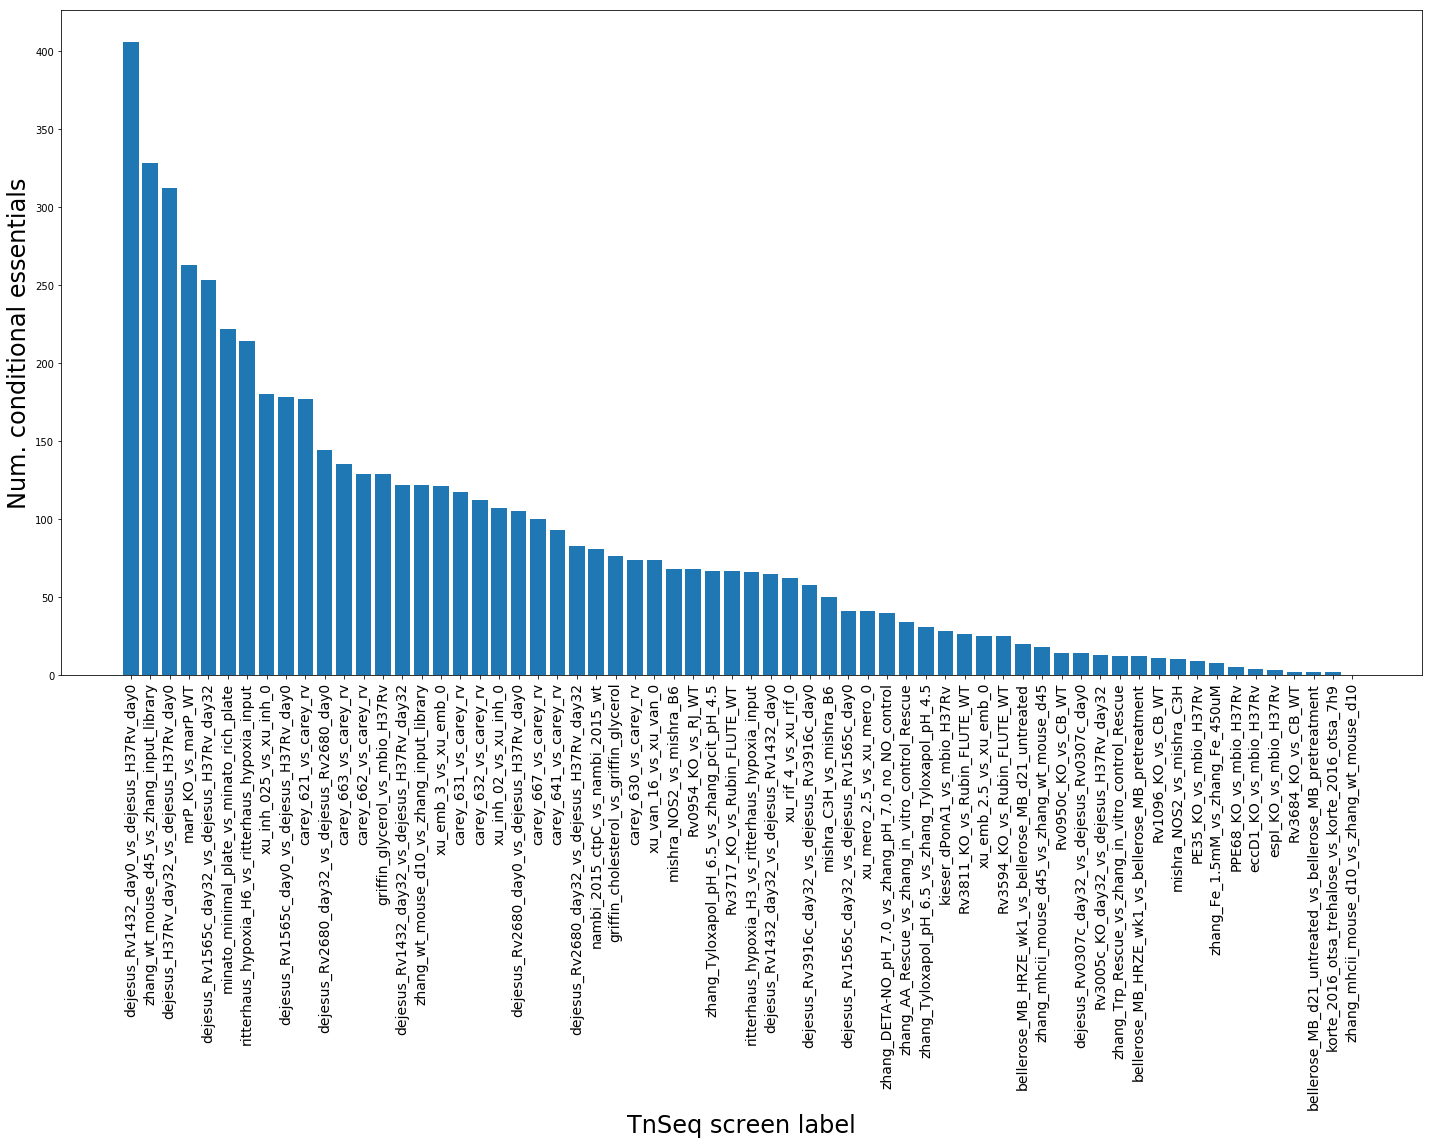

In [8]:
df_Tn_screen_stats = df_bin[df_bin.columns[:-1]].sum(numeric_only=True).sort_values(ascending = False)
vals = df_Tn_screen_stats.values
labels = df_Tn_screen_stats.keys()
xvals = np.arange(len(vals))
plt.figure(figsize = (20,16))
plt.bar(xvals, vals)
plt.ylabel('Num. conditional essentials', fontsize = 24)
xt = plt.xticks(xvals, np.array(labels), rotation = 90, fontsize = 14)
plt.xlabel('TnSeq screen label', fontsize = 24)
plt.tight_layout()
file_out = os.path.join(dir_figs, 'Tn_screen_stats.png')
plt.savefig(file_out, dpi = 300)


# Rank genes by the number of times they're essential across conditions: 

In [8]:
df_rv_sum = df_bin[['Rv_ID', 'sum_CES']].copy()
df_rv_sum['Rv_num'] = np.arange(df_rv_sum.shape[0])
df_rv_sum.head(5)

,Rv_ID,sum_CES,Rv_num
0,Rv0001,0.0,0
1,Rv0002,0.0,1
2,Rv0003,2.0,2
3,Rv0004,0.0,3
4,Rv0005,0.0,4


In [9]:
df_xticks = df_rv_sum[df_rv_sum.Rv_ID.isin(['Rv0001', 'Rv0500', 'Rv1000c', 'Rv1500', 'Rv2000', 'Rv2500c', 'Rv3000', 'Rv3500c', 'Rv3900c'])]

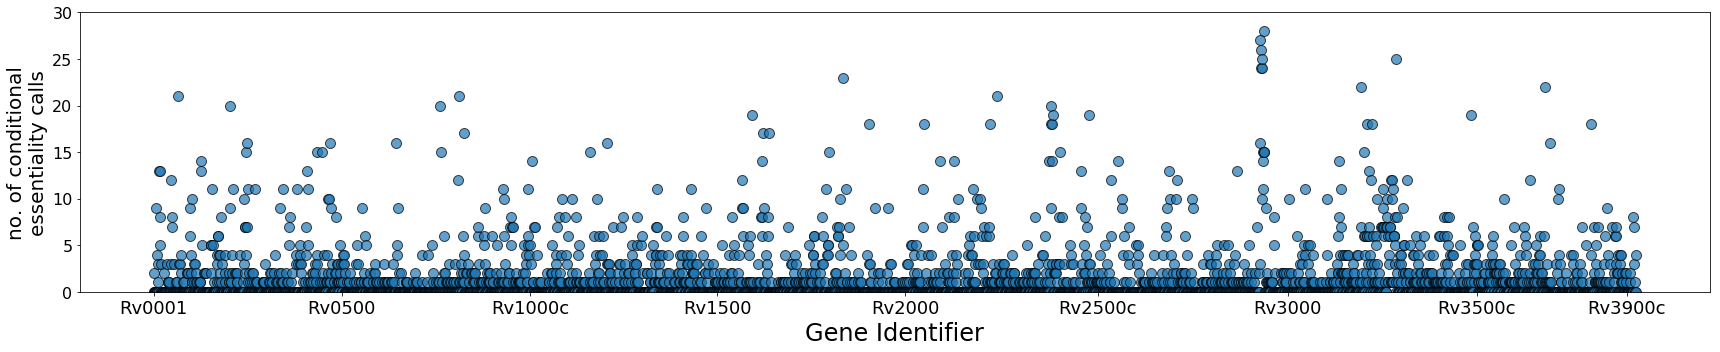

In [10]:
plt.figure(figsize=(24,5))
plt.scatter(df_rv_sum.Rv_num, df_rv_sum.sum_CES, s = 100, edgecolors='k', alpha = 0.7)
plt.ylim(0, 30)
xt = plt.xticks(list(df_xticks.Rv_num), list(df_xticks.Rv_ID), fontsize = 18)
plt.xlabel('Gene Identifier', fontsize = 24)
yt = plt.yticks(fontsize = 16)
plt.ylabel('no. of conditional\nessentiality calls', fontsize = 20)
plt.tight_layout()



#### sliding window average:

In [12]:
window_size = 4
list_mean_counts = []
for i in range(0, df_rv_sum.shape[0] - window_size):
    window = range(i, i+window_size)
    df_temp = df_rv_sum.iloc[window]
    mean_counts = df_temp.sum_CES.mean()
    list_mean_counts.append(mean_counts)

In [13]:
df_rv_sum_window = df_rv_sum[2:-2].copy()
df_rv_sum_window['mean_sum_CES'] = list_mean_counts

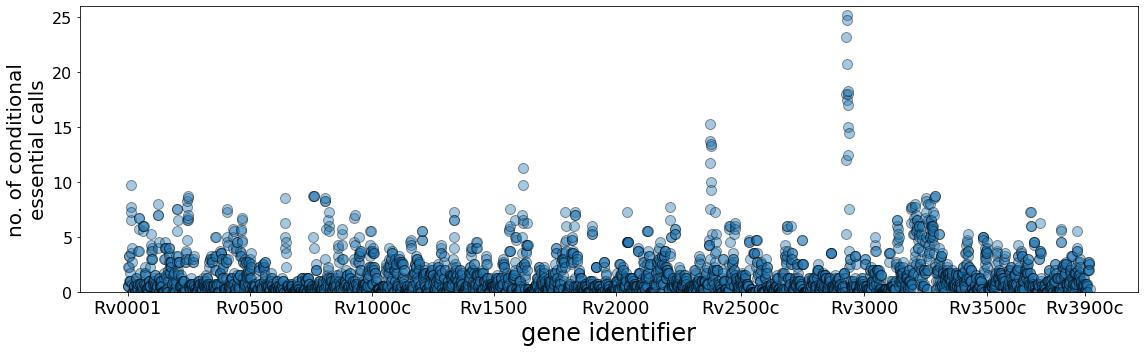

In [14]:
plt.figure(figsize=(16,5))
plt.scatter(range(df_rv_sum.shape[0] - window_size), list_mean_counts, s = 100, edgecolors='k', alpha = 0.4)
# plt.plot(range(df_rv_sum.shape[0] - window_size), list_mean_counts, 'k')
plt.ylim(0, 26)
xt = plt.xticks(list(df_xticks.Rv_num), list(df_xticks.Rv_ID), fontsize = 18)
plt.xlabel('gene identifier', fontsize = 24)
yt = plt.yticks(fontsize = 16)
plt.ylabel('no. of conditional\nessential calls', fontsize = 20)
plt.tight_layout()

file_out = os.path.join(dir_figs, 'Tn_manhattan_window_4.png')
plt.savefig(file_out, dpi = 300)

#### Interactive version: 

In [15]:
df_rv_sum_window.hvplot.scatter(
    x = 'Rv_num', 
    y = 'mean_sum_CES', xlabel="Gene Identifier", ylabel="Mean sum CES",
    hover_cols = ['Rv_ID', 'sum_CES'],
    cmap = 'Accent', 
    alpha = 0.4,
    padding = 0.1, 
    size = 55,
    width = 1300,
    height = 300
)

:Scatter   [Rv_num]   (mean_sum_CES,Rv_ID,sum_CES)

In [21]:
df_bin_annot[ (df_bin_annot.Rv_ID.str.contains('Rv292')) |  (df_bin_annot.Rv_ID.str.contains('Rv293')) | (df_bin_annot.Rv_ID.str.contains('Rv294'))][['Rv_ID','gene_name', 'func_tuberculist' ,'sum_CES']]

,Rv_ID,gene_name,func_tuberculist,sum_CES
3015,Rv2920c,amt,cell wall and cell processes,0.0
3016,Rv2921c,ftsY,cell wall and cell processes,0.0
3017,Rv2922A,acyP,intermediary metabolism and respiration,0.0
3018,Rv2922c,smc,cell wall and cell processes,7.0
3019,Rv2923c,-,conserved hypotheticals,0.0
3020,Rv2924c,fpg,information pathways,0.0
3021,Rv2925c,rnc,information pathways,0.0
3022,Rv2926c,-,conserved hypotheticals,0.0
3023,Rv2927c,-,conserved hypotheticals,0.0
3024,Rv2928,tesA,lipid metabolism,2.0


### Distribution of essentiality counts across genes: 

How many genes are conditionally essential in 10 or more screens? 0 screens?

In [9]:
df_bin[df_bin.sum_CES.values == 0][['Rv_ID', 'sum_CES']].shape

(2453, 2)

In [10]:
df_bin[df_bin.sum_CES.values >= 10][['Rv_ID', 'sum_CES']].shape

(121, 2)

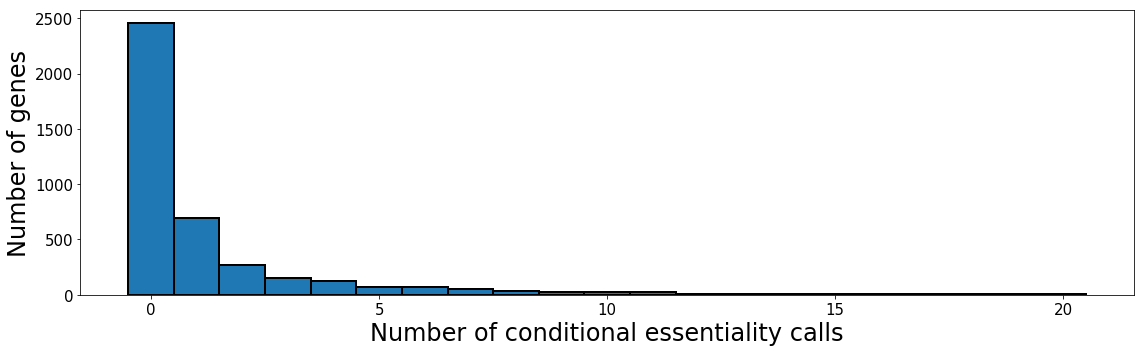

In [11]:
plt.figure(figsize = (16,5))
hist = plt.hist(df_bin['sum_CES'].values, bins = np.arange(-0.5, 21), edgecolor='black', linewidth=2)

plt.xlabel('Number of conditional essentiality calls', fontsize = 24)
plt.ylabel('Number of genes', fontsize = 24)
plt.xticks(fontsize = 15)
yt = plt.yticks(fontsize = 15)
plt.tight_layout()
out_file = os.path.join(dir_figs, 'gene_stats.png')
# plt.savefig(out_file, dpi = 300)

# Can we identify the core essentials in the 0-bin?

In [13]:
file_mbio = '../../data/SI_datasets/2017A_DeJesus_Iorger/table_1.xlsx'
df_mbio = pd.read_excel(file_mbio)
df_mbio['Final Call'].unique()

array(['ES', 'NE', 'ESD', 'GD', 'Uncertain', 'GA'], dtype=object)

In [22]:
df_mbio_ES = df_mbio[ (df_mbio['Final Call'].values =='ES') | (df_mbio['Final Call'].values =='GD' )].copy()

df_tn_mbio = df_bin[df_bin.Rv_ID.isin(df_mbio_ES.Rv_ID)][['Rv_ID', 'sum_CES']]
df_tn_mbio.shape

(596, 2)

In [15]:
x_vals = np.array(df_tn_mbio.sum_CES.value_counts().index)
y_vals = np.array(df_tn_mbio.sum_CES.value_counts().values)

How many of the mbio 2017 essentials have zero conditional essentiality calls?

In [16]:
df_tn_mbio[df_tn_mbio.sum_CES.values==0].shape

(425, 2)

Show these in the histogram: 

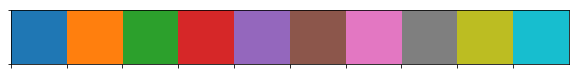

In [17]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [19]:
num_disp = df_bin[df_bin.sum_CES.values == 0].shape[0]

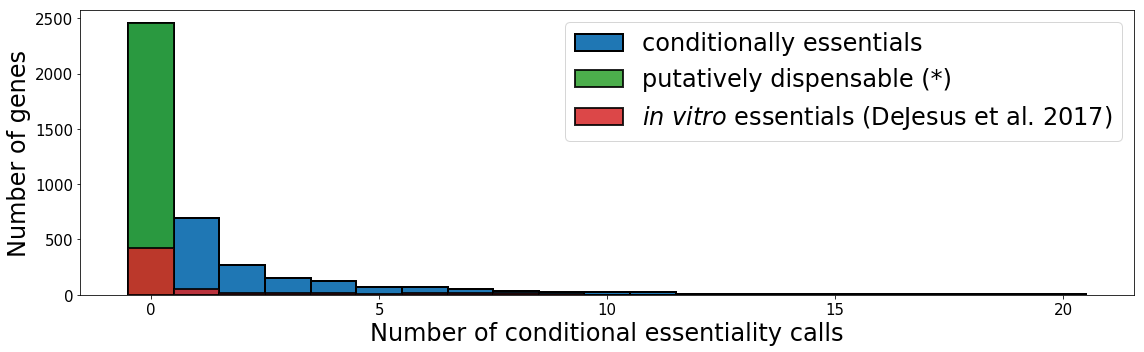

In [26]:
num_ES = df_mbio_ES.shape[0]

plt.figure(figsize = (16,5))

hist = plt.hist(df_bin['sum_CES'].values, bins = np.arange(-0.5, 21), color=current_palette[0], edgecolor='black', linewidth=2)
plt.bar(0, num_disp, color = current_palette[2], width=1, edgecolor='k', linewidth=2, alpha=0.85)
plt.bar(x_vals, y_vals, color = current_palette[3], width=1, edgecolor='k', linewidth=2, alpha=0.85)

# sns.distplot(df_tn['sum_all'].values, bins = np.arange(-0.5, 21))
plt.xlabel('Number of conditional essentiality calls', fontsize = 24)
plt.ylabel('Number of genes', fontsize = 24)
plt.xticks(fontsize = 15)
yt = plt.yticks(fontsize = 15)
plt.legend(['conditionally essentials', 'putatively dispensable (*)','$\it{in}$ $\it{vitro}$ essentials (DeJesus et al. 2017)'], fontsize = 24)
plt.tight_layout()

# out_file = os.path.join(dir_figs, 'gene_stats.png')
# plt.savefig(out_file, dpi = 300)

##### New version (02/01/2021)

In [121]:
# for the new version of the plot
df_mbio_ES_ONLY = df_mbio[ (df_mbio['Final Call'].values =='ES')].copy()
df_mbio_GD = df_mbio[ (df_mbio['Final Call'].values =='GD' )].copy()
df_mbio_GA = df_mbio[ (df_mbio['Final Call'].values =='GA' )].copy()
df_mbio_NE = df_mbio[ (df_mbio['Final Call'].values =='NE' )].copy()

# 
df_tn_mbio_ES_ONLY = df_bin[df_bin.Rv_ID.isin(df_mbio_ES_ONLY.Rv_ID)][['Rv_ID', 'sum_CES']]
df_tn_mbio_GD = df_bin[df_bin.Rv_ID.isin(df_mbio_GD.Rv_ID)][['Rv_ID', 'sum_CES']]
df_tn_mbio_GA = df_bin[df_bin.Rv_ID.isin(df_mbio_GA.Rv_ID)][['Rv_ID', 'sum_CES']]
df_tn_mbio_NE = df_bin[df_bin.Rv_ID.isin(df_mbio_NE.Rv_ID)][['Rv_ID', 'sum_CES']]

# 
xbins = np.arange(-0.5, 25.5, 1)
yx_vals_ES_ONLY = np.histogram(df_tn_mbio_ES_ONLY.sum_CES.values, bins = xbins)
yvals_ES_ONLY = yx_vals_ES_ONLY[0]

yx_vals_GD = np.histogram(df_tn_mbio_GD.sum_CES.values, bins = np.arange(-0.5, 25.5, 1))
yvals_GD = yx_vals_GD[0]

yx_vals_GA = np.histogram(df_tn_mbio_GA.sum_CES.values, bins = np.arange(-0.5, 25.5, 1))
yvals_GA = yx_vals_GA[0]

yx_vals_NE = np.histogram(df_tn_mbio_NE.sum_CES.values, bins = np.arange(-0.5, 25.5, 1))
yvals_NE = yx_vals_NE[0]

In [115]:
xvals_ALL = np.arange(0, 25)

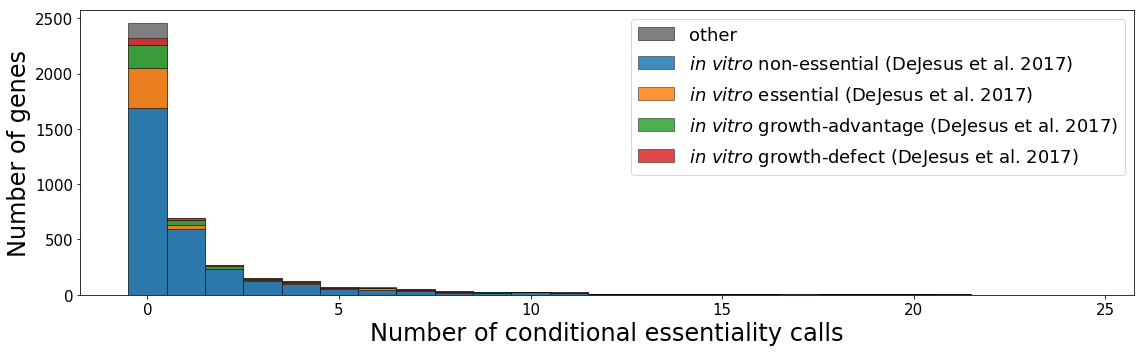

In [144]:
plt.figure(figsize = (16,5))
lw_param = 0.5

hist = plt.hist(df_bin['sum_CES'].values, bins = np.arange(-0.5, 21), color=current_palette[-3], edgecolor='black', linewidth=lw_param)

plt.bar(xvals_ALL, yvals_NE, color = current_palette[0], width=1, edgecolor='k', linewidth=lw_param, alpha=0.85)

arr_bottom = yvals_NE
plt.bar(xvals_ALL, yvals_ES_ONLY, bottom=arr_bottom , color = current_palette[1], width=1, edgecolor='k', linewidth=lw_param, alpha=0.85)

arr_bottom = arr_bottom + yvals_ES_ONLY
plt.bar(xvals_ALL, yvals_GA, bottom=arr_bottom , color = current_palette[2], width=1, edgecolor='k', linewidth=lw_param, alpha=0.85)

arr_bottom = arr_bottom + yvals_GA
plt.bar(xvals_ALL, yvals_GD, bottom=arr_bottom , color = current_palette[3], width=1, edgecolor='k', linewidth=lw_param, alpha=0.85)

plt.legend(['other', '$\it{in}$ $\it{vitro}$ non-essential (DeJesus et al. 2017)', '$\it{in}$ $\it{vitro}$ essential (DeJesus et al. 2017)', 
           '$\it{in}$ $\it{vitro}$ growth-advantage (DeJesus et al. 2017)', '$\it{in}$ $\it{vitro}$ growth-defect (DeJesus et al. 2017)'], fontsize = 18)

plt.xlabel('Number of conditional essentiality calls', fontsize = 24)
plt.ylabel('Number of genes', fontsize = 24)
plt.xticks(fontsize = 15)
yt = plt.yticks(fontsize = 15)

plt.tight_layout()

out_file = os.path.join(dir_figs, 'gene_stats_v2.png')
plt.savefig(out_file, dpi = 300)

In [145]:
file_out = '../../data/annotations/data_for_Michael_1.csv'
df_bin.to_csv(file_out, index = False)

file_out = '../../data/annotations/data_for_Michael_2.csv'
df_mbio.to_csv(file_out, index = False)

Which have 1 or more conditional essentiality calls?

In [71]:
rvid_ES_CES = df_tn_mbio[df_tn_mbio.sum_all>0].Rv_ID.values

In [67]:
def essentiality_calls(df, gene_id):
# Return the columns in which a given gene is called essential:
    cols = df.columns[1:]
    col_list = []
    for col in cols:
        if df[df['Rv_ID']==gene_id][col].values[0] == 1:
            col_list.append(col)
            
    return col_list

In [73]:
CES_list = []
for gene_id in rvid_ES_CES:
    CES_list.append(essentiality_calls(df_tn, gene_id))
df_ES_CES = pd.DataFrame()
df_ES_CES['Rv_ID'] = rvid_ES_CES
df_ES_CES['CES_calls'] = ['; '.join(CES[:-1]) for CES in CES_list]

In [75]:
file_out = '../../dep/data/ES_with_CES_calls.csv'
df_ES_CES.to_csv(file_out, index = False)

In [77]:
df_ES_CES[df_ES_CES.CES_calls.str.contains('carey')].shape

(105, 2)

### Which genes are the tail of the distribution?

In [102]:
df_tn_top_wName = df_tn_top.merge(df_mbio, how = 'left', on = 'Rv_ID')[['Rv_ID', 'sum_all', 'Name']]
file_out = '../../data/top_genes_CES_calls.xlsx'
df_tn_top_wName.to_excel(file_out, index= False)

### Cumulative distribution:

In [50]:
myrange = np.arange(df_tn['sum_all'].max())
cdf = np.zeros(len(myrange))
for n in myrange:
    cdf[int(n)] = df_tn[df_tn.sum_all<=n].shape[0] / df_tn.shape[0]

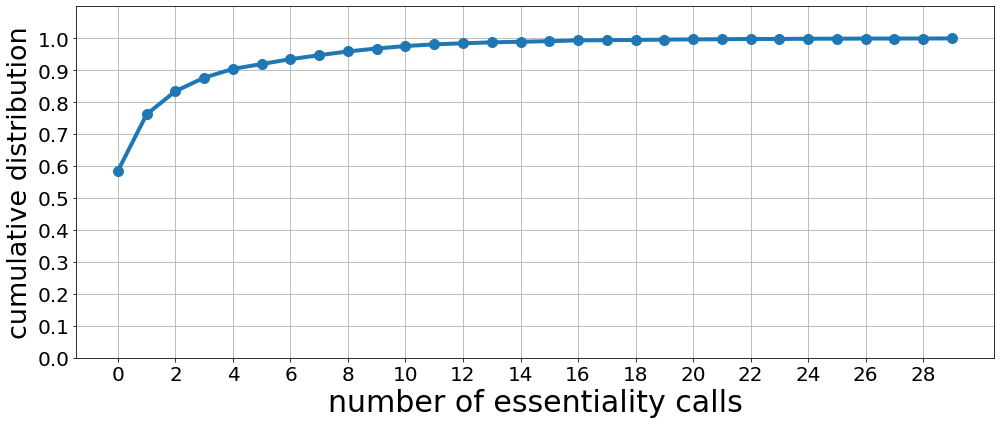

In [51]:
plt.figure(figsize = (14,6))
plt.plot(myrange, cdf, '-o', lw = 4, ms = 10)
xt = plt.xticks( np.arange(0, df_tn['sum_all'].max(), 2), fontsize = 20)
plt.ylim(0, 1.1)
yt = plt.yticks(np.arange(0, 1.1, 0.1), fontsize = 20)
plt.xlabel('number of essentiality calls', fontsize = 30)
plt.ylabel('cumulative distribution', fontsize = 27)
plt.grid(True, xdata = myrange)
plt.tight_layout()
